# **Project Milestone 1 - Kevin Skelly, Pantheon Database, kskelly03.github.io**


# Project Goals

The goal of this project will be to examine the current state of famous figures on Wikipedia. This data can serve a multitude of interesting conclusions: most notably an examination of discrimination based on factors such as race, gender, and nationality on Wikipedia. I hope by the end of this project to be able to provide a comprehensive description of the famous faces on Wikipedia and the data behind them.

# Dataset Description


The Dataset I am most heavily considering working with is MIT's comprehensive list of famous faces, known as [Pantheon](https://pantheon.world/data/faq). Pantheon uses Wikipedia entries mined from Wikidata and the English, French, German, Italian, Spanish, Portuguese and Swedish editions of Wikipedia. The dataset comprises of over 2.29 million individuals and is cross-verified. The dataset provides birth and death dates, gender, citizenship, occupations, and other details. The pantheon database has been visited extensively by researchers of all kind. Meaningful conclusions that can be taken from the database include:


1.   Historical Analysis of Popularity
2.   Cultural and Geographic Analysis
3.   Occupational Trends
4. Gender and Popularity
5. Language and Wikipedia
6. Social Network Analysis:
7. Predictive modeling
8. Entertainment Industry Insights
9. ... and many more

This dataset has stood out to me as a fun way to examine all the trends of humanity in the forms of pop culture. I am excited to see the ways in which famous people have evolved over time and make conclusions from this dataset.

In case of any issues with learning about this dataset. I have also discovered two other datasets to work with. The first is a Survivor dataset, comprising of an overwhelming amount of data from every season of the popular reality show to date. I would be very interested in using this dataset to create a massive predictive model that shows the optimal strategy to win at America's favorite reality show.

My other dataset is a dataset comprising of all the known billionaires in the world. While a more simple dataset, the examination of the uber rich is something that I find to be very interesting and rewarding. A multitude of conclusions can be drawn about the people who collectively hold such a large percentage of the world's wealth, and I would love to learn about the stories behind each of them. It could also be fun to choose the most likely route to become a billionaire in the world.





# Collaboration Plan

Unfortunately, I was not able to find a partner for this project, but I will still create a plan for myself in order to stay on track. Ideally, I plan to spend 1 hour twice per week working on different models and projects with the dataset. This way, by the end of the project I will have a multifaceted prject with a wide array of ETL and conclusions from the data.

# ETL

First, we will load our dataset into pandas

In [21]:
import matplotlib.pyplot as plt
%cd /content
!git clone https://github.com/kskelly03/DataProject.git
%cd /content/DataProject
import pandas as pd
import numpy as np
df1 = pd.read_csv('person_2020_update.csv')
df1.head()


/content
fatal: destination path 'DataProject' already exists and is not an empty directory.
/content/DataProject


<ipython-input-21-9e825c770d47>:7: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('person_2020_update.csv')


,id,wd_id,wp_id,slug,name,occupation,prob_ratio,gender,twitter,alive,...,deathdate,deathyear,bplace_geacron_name,dplace_geacron_name,is_group,l_,age,non_en_page_views,coefficient_of_variation,hpi
0,18934,Q9458,18934,Muhammad,Muhammad,RELIGIOUS FIGURE,0.0,M,NaN,False,...,0632-06-08,632.0,Mecca,NaN,False,27.918400,1450.0,5160422.0,3.199355,100.000000
1,17414699,Q720,17414699,Genghis_Khan,Genghis Khan,MILITARY PERSONNEL,0.0,M,NaN,False,...,1227-08-18,1227.0,NaN,NaN,False,25.843621,858.0,3249211.0,2.753641,97.723669
2,18079,Q762,18079,Leonardo_da_Vinci,Leonardo da Vinci,INVENTOR,0.0,M,NaN,False,...,1519-05-02,1519.0,NaN,NaN,False,17.545406,568.0,5362406.0,4.796629,97.460691
3,14627,Q935,14627,Isaac_Newton,Isaac Newton,PHYSICIST,0.0,M,NaN,False,...,1727-03-31,1726.0,NaN,NaN,False,21.608920,378.0,3431331.0,4.632474,96.836567
4,17914,Q255,17914,Ludwig_van_Beethoven,Ludwig van Beethoven,COMPOSER,0.0,M,NaN,False,...,1827-03-26,1827.0,NaN,Austria,False,19.796430,250.0,5179518.0,3.926626,96.583969


Following this, I want to analyze the different keys to see what minor operations I can make.

In [22]:
df1.keys()

Index(['id', 'wd_id', 'wp_id', 'slug', 'name', 'occupation', 'prob_ratio',
       'gender', 'twitter', 'alive', 'l', 'hpi_raw', 'bplace_name',
       'bplace_lat', 'bplace_lon', 'bplace_geonameid', 'bplace_country',
       'birthdate', 'birthyear', 'dplace_name', 'dplace_lat', 'dplace_lon',
       'dplace_geonameid', 'dplace_country', 'deathdate', 'deathyear',
       'bplace_geacron_name', 'dplace_geacron_name', 'is_group', 'l_', 'age',
       'non_en_page_views', 'coefficient_of_variation', 'hpi'],
      dtype='object')

Looking at these categories, I think one interesting idea would be to group by occupation and calculate popularity statistics.

This will allow me to look at the distribution of popularity among occupations. The "HPI" category, stands for historical popularity index.

In [23]:
occupation_stats = df1.groupby('occupation')['hpi'].agg(['mean', 'median', 'std', 'count']).reset_index()
occupation_stats = occupation_stats.sort_values(by='mean', ascending=False)
occupation_stats

,occupation,mean,median,std,count
80,PUBLIC WORKER,72.922437,73.919678,6.636704,15
72,PIRATE,72.536138,73.132860,4.981598,25
28,CRITIC,72.062821,72.074040,2.832190,5
14,BULLFIGHTER,71.621821,71.621821,NaN,1
65,OCCULTIST,71.410613,68.525363,7.634868,37
...,...,...,...,...,...
94,SWIMMER,45.797819,44.616589,7.990910,392
49,HOCKEY PLAYER,45.640838,44.312967,6.768850,364
9,BADMINTON PLAYER,43.880117,43.613529,4.758223,81
100,YOUTUBER,42.828491,42.317825,10.046174,41


We can plot the top 10 occupations in a bar plot to see the top 10 most historically popular occupations on wikipedia. At this moment I haven't been able to find any documentation on how hpi is calculated, but the graph is still nonetheless very fun to look at.

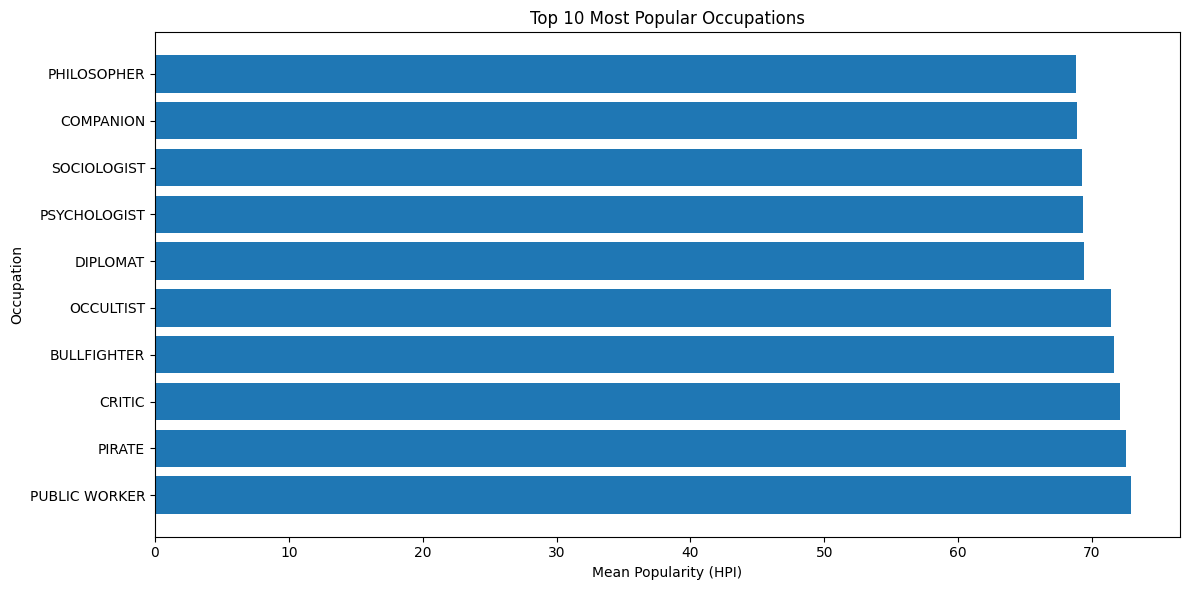

In [24]:
top_n_occupations = 10
occupation_stats = occupation_stats.head(top_n_occupations)
plt.figure(figsize=(12, 6))
plt.barh(occupation_stats['occupation'], occupation_stats['mean'])
plt.xlabel('Mean Popularity (HPI)')
plt.ylabel('Occupation')
plt.title('Top {} Most Popular Occupations'.format(top_n_occupations))
plt.tight_layout()
plt.yticks(rotation=0)
plt.show()



